<a href="https://colab.research.google.com/github/nanpolend/machine-learning/blob/master/Histograms%E7%9A%84%E6%A6%82%E5%BF%B5%E8%A7%A3%E9%87%8B_%E8%AE%93%E4%BD%A0%E7%9C%8B%E7%9A%84%E6%B8%85%E7%9C%8B%E7%9A%84%E6%98%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" width=160px align="left" />
<!--180020177X-1-->

## <font color=red> 既然要讓電腦看清楚圖片，那我們當然要先讓照片是清楚的啊!!
-----
```
    對於相機採集的原始圖像經常會出現一種現象，
    即圖像所有像素的灰度值分佈不均勻，
    而是集中在某一特定的小區域，導致圖像中的所有信息的灰度值都很接近，即對比度差，
    很難從圖像中分辨出某一特徵的信息。
    而質量較高的圖像中，像素的強度應該均衡的分佈。
```
-----
```
    為了提高圖像處理的效果，經常會在圖像處理之前進行直方圖均衡化，
    即將圖像的直方圖灰度級別由集中在某一小部分灰度級分散成在所有灰度級別都有一定的覆蓋，
    所以通過直方圖均衡化的方法用來增強局部或整體的對比度。
```

## <font color=red>什麼是Histograms
-----
Histograms是一個強力的工具，可以讓我們清楚了解照片內容的分布
----
```
左圖是一個圖像的像素組合，我們拿到的是一個12*20 大小的圖像像素；
右圖就是他的直方圖展示，橫軸表示在0~255之間的區間塊，
我們將其分為16個區間(bin)，統計圖像中每個像素的個數，
右圖反映的時圖像中每個像素出現的頻率，橫軸是像素區間，縱坐標是像素出現的頻率。
```
![image-5.png](attachment:image-5.png)
----
![image-4.png](attachment:image-4.png)

## <font color=red>處理目標
------
```
    在完美均衡的直方圖中，每個柱的值都應該相等，
    如果可以均衡分配，那.....
    這樣就可以達到眼睛清、視覺明的效果
```
![image-5.png](attachment:image-5.png)

## <font color=red>用OpenCV來畫Histograms
--------
### cv2.calcHist([images], [channels], mask, [histSize], [ranges])
-------
```
    [images]-目標照片
    
    [channels]-
       顏色通道,
       [0, 1] for the B and G,
       [0, 1, 2] for all three planes combined
    
    mask-遮色片，黑白兩色，白色的就是你要看到的ROI，剩下部分都是黑色  
    
    [histSize]-要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
    
    [ranges]-X軸(像素強度)的範圍，預設為[0,256]
```

In [ ]:
import cv2
import matplotlib.pyplot as plt

#依照圖片格式，把圖片讀入
im = cv2.imread('target.png', cv2.IMREAD_UNCHANGED)
mymask= cv2.imread('mask cherry.png', cv2.IMREAD_UNCHANGED)

In [ ]:
cv2.imshow("image",im)
cv2.imshow("mask",mymask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import pandas as pd
hist= cv2.calcHist(im, channels=[0], mask=None, histSize=[10], ranges=[0,256])
pd.DataFrame(hist)
#ranges可以調成[0,20]，這時候你就是只看20以下的像數值的部分

,0
0,879.0
1,677.0
2,256.0
3,228.0
4,122.0
5,81.0
6,28.0
7,3.0
8,0.0
9,0.0


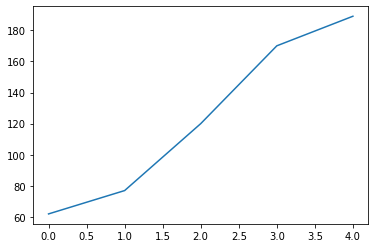

In [ ]:
plt.plot(hist)

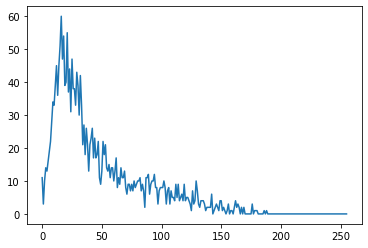

In [ ]:
hist= cv2.calcHist(im, channels=[1], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist)

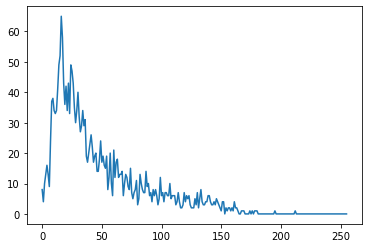

In [ ]:
hist= cv2.calcHist(im, channels=[2], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist)

## <font color=red>從上面的結果來看，你可以看到任何一個通道的顏色分布都是以數值低為主，代表色調偏黑
--------


## <font color=red>用mask遮掩一下，再讀一次

Text(0.5, 1.0, 'Red plane of ROI cherry')

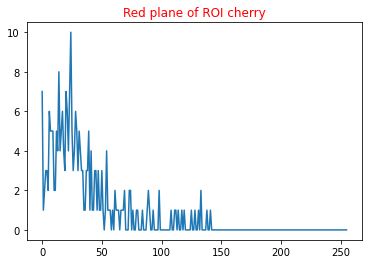

In [ ]:
hist = cv2.calcHist([im],[0], mymask,[256], [0,255])
plt.plot(hist)
plt.title('Red plane of ROI cherry', color='r')

## <font color=red>cv2.calcHist的好處就是可以做mask，要不然matplotlib也可以畫Histograms

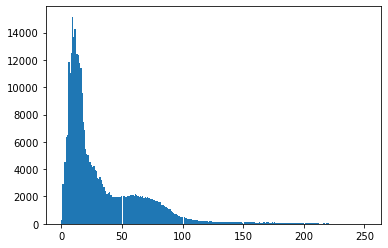

In [ ]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('target.png', cv2.IMREAD_UNCHANGED)
#.ravel()把3D結構全部攤平，才有辦法數數
ax = plt.hist(img.ravel(), bins = 256)
plt.show()

## <font color=red>我們希望可以從Histograms上面看到什麼?
  dark image的數值分布偏0  
  light image的數值分布偏255  
  低對比的圖片，數值分布會集中在某些特定值  
  高對比的圖片，數值分布會分散在區間內  
--------
![image.png](attachment:image.png)

## <font color=red>我們希望可以達到Histogram Equalization
  Histogram Equalization    
  就是要讓散布均勻，那對比性就會提高

## <font color=red>運作方式
----
第一步 樣本像素如下
![image.png](attachment:image.png)
----
第二步 統計運算-透過算比例，把原本的分布重新投射到0-255的空間裡面
![image-3.png](attachment:image-3.png)
----
第三步 調整結果
![image-4.png](attachment:image-4.png)
   

In [ ]:
255*.4375

111.5625

## <font color=red>直接用cv2.equalizeHist，搞定

In [ ]:
import cv2
img= cv2.imread('dark_image1.png', 0)
cv2.imshow('Original Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

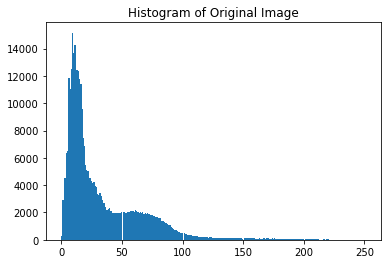

In [ ]:
import matplotlib.pyplot as plt
ax = plt.hist(img.ravel(), bins= 256)
plt.title('Histogram of Original Image')
plt.show()

In [ ]:
#對圖開始做一下平均的動作
histequ = cv2.equalizeHist(img)
cv2.imshow('Histogram Equalized Image', histequ)
cv2.waitKey(0)
cv2.destroyAllWindows()

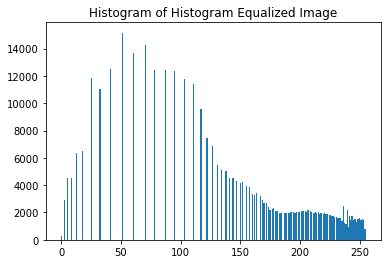

In [ ]:
import matplotlib.pyplot as plt
ax = plt.hist(histequ.ravel(), bins= 256)
plt.title('Histogram of Histogram Equalized Image')
plt.show()

#你會發現整個圖的分布就平均了

In [ ]:
#兩張圖對比一下
import numpy as np
img_with_histequ = np.hstack((img,histequ)) #利用np的horizontal堆疊就可以達到
cv2.imshow('Comparison', img_with_histequ)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 調整亮點的數目增加了，所以整張圖感覺變亮了!
你可以看到人揹著背包  
牆上有裂紋
右手邊你也可以看到走廊的深處

------

但是經過處理後，你會發現有過曝的地方...比如人後面的那個袋子，我們完全看不出來它的材質了


## <font color=red>CLAHE演算法-Contrast Limited Adaptive Histogram Equalization-自適應直方圖均衡化
-----
```
    局部直方圖均衡化，即把圖像分成許多小塊（比如按8*8 作為一個小塊），
    那麼對每個小塊進行均衡化。
    這種方法主要對圖像直方圖不是那麼單一的（比如存在多峰情況）的圖像比較實用。
```
-----
![image-2.png](attachment:image-2.png)
----
   1.每個圖片分割成幾個grid   
   2.設定一個門檻值(clip limit)，超過門檻值的都平均分配到各個range裡面  
   3.綠色的部分，就是因為墊高了，所以又超出門檻值了，所以就會反覆運算，直到超過門檻值的個數很少
-----
## [影像增強的算法解釋](https://iter01.com/518513.html)

## <font color=red >cv2.createCLAHE
----
    
```

     createCLAHE(clipLimit=None, tileGridSize=None)
    
```
----
```
     clipLimit：顏色對比度的閾值
     titleGridSize：進行像素均衡化的網格大小，即在多少網格下進行直方圖的均衡化操作
```
-------


In [ ]:
import cv2
img= cv2.imread('dark_image1.png', 0)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))  #用8*8的大小做分析處理
out = clahe.apply(img)
cv2.imshow('CLAHE image', out)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: ignored

## <font color=red ><小測驗>請幫我測試一下不同clipLimit值的圖片效果可以嗎?

## <font color=red ><答案>

In [ ]:
import cv2
import matplotlib.pyplot as plt

img= cv2.imread('dark_image1.png', 0)
#clipLimit數字越大會讓區域對比加強
for i in range(2,10):
    clahe = cv2.createCLAHE(clipLimit=i, tileGridSize=(8,8))  #分割成8*8 64片，
    out = clahe.apply(img)
    cv2.imshow(f'CLAHE image{i}', out)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: ignored

## <font color=red ><小測驗>請幫我測試一下不同tileGridSize值的圖片效果可以嗎?

## <font color=red ><答案>

In [ ]:
import cv2
img= cv2.imread('dark_image1.png', 0)
#clipLimit數字越大會讓區域對比加強
for i in range(10,120,10):
    clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(i,i))  #分割成8*8 64片，
    out = clahe.apply(img)
    cv2.imshow(f'CLAHE image{i}', out)
cv2.waitKey(0)
cv2.destroyAllWindows()

## <font color=red>重要結論
---------
### clipLimit的數值提升，可以讓圖片對比度增加
### tileGridSize的數值提升，可以讓圖像邊界更清晰

## <font color=red>對彩色照片做Histogram Equalization

## <font color=red>從RGB的角度來做，每一個通道都要處理

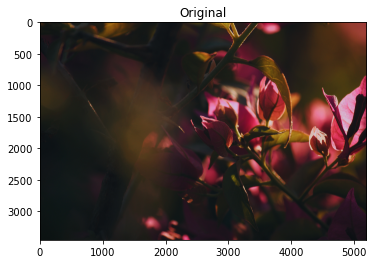

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bloom.jpg')
origrgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(origrgb)
plt.title('Original')
plt.show()

In [ ]:
b,g,r = cv2.split(img)      #分離色彩
b = cv2.equalizeHist(b)     #開始進行Histogram Equalization
g = cv2.equalizeHist(g)
r = cv2.equalizeHist(r)

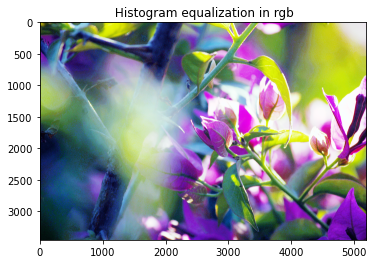

In [ ]:
bgr = cv2.merge([b,g,r])
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(rgb)
plt.title(' Histogram equalization in rgb')
plt.show()

## <font color=red ><小測驗>請幫我試試看轉成HSV的顏色空間，再做做看Histogram Equalization

## <font color=red ><答案>

## <font color=red>在HSV的顏色空間裡面做Histogram Equalization

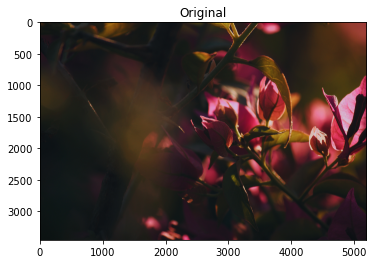

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('bloom.jpg')
origrgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB);
imgplot = plt.imshow(origrgb)
plt.title('Original')
plt.show()

In [ ]:
imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(imgHSV)

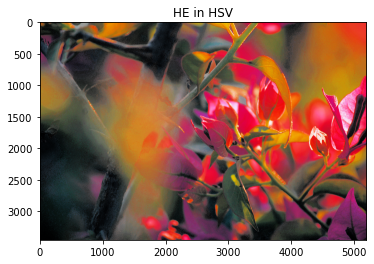

In [ ]:
v = cv2.equalizeHist(v)
s = cv2.equalizeHist(s)
hsv = cv2.merge([h,s,v])
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
plt.imshow(rgb)
plt.title('HE in HSV')
plt.show()

#你應該有發現和前面的RGB比較，看起來比較自然啦!! 你覺得為什麼??

## <font color=red ><小測驗>請幫我試試看轉成HSV的顏色空間，用CLAHE再做一次

## <font color=red ><答案>

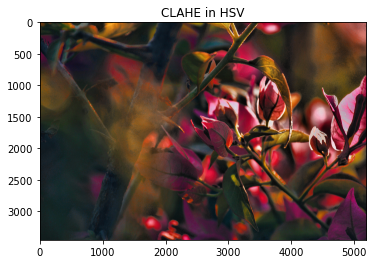

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('bloom.jpg')
imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(imgHSV)
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))
v = clahe.apply(v)
s = clahe.apply(s)
hsv = cv2.merge([h,s,v])
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
plt.imshow(rgb)
plt.title('CLAHE in HSV')
plt.show()

#清晰 自然

## <font color=red>LAB顏色空間
---------
    如果你調整的結果是要看到對比度，那要用這個
---------
    Lab色彩模型是由亮度（L）和有關色彩的a, b三個要素組成。L表示明度（Luminosity），a表示從洋紅色至綠色的範圍，b表示從黃色至藍色的範圍。
---------
<!--180020177X-170-->

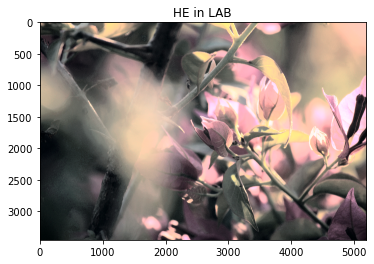

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bloom.jpg')
imgLAB = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
imgLAB[:,:,0]= cv2.equalizeHist(imgLAB[:,:,0])  #plane 0 就是 L channel
rgb = cv2.cvtColor(imgLAB,cv2.COLOR_LAB2RGB)
plt.imshow(rgb)
plt.title('HE in LAB')
plt.show()

#因為只有L是關於亮度，所以只對這層下手

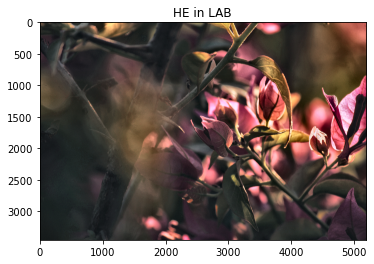

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bloom.jpg')
imgLAB = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))
imgLAB[:,:,0]= clahe.apply(imgLAB[:,:,0])  #plane 0 就是 L channel
rgb = cv2.cvtColor(imgLAB,cv2.COLOR_LAB2RGB)
plt.imshow(rgb)
plt.title('HE in LAB')
plt.show()

## <font color=red>挑選ROI做對比度調整
<!--180020177X-484-->

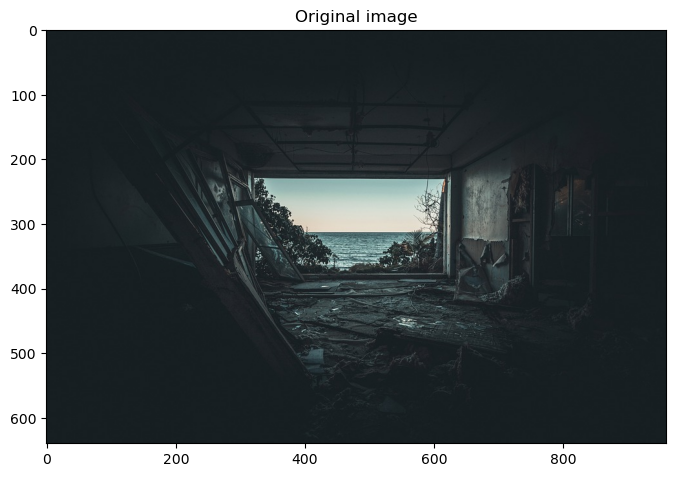

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

im = cv2.imread('ocean.jpg')
origrgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB);

figure(figsize=(8, 6), dpi=100)
imgplot = plt.imshow(origrgb)
plt.title('Original image')
plt.show()

In [ ]:
x,y,w,h = cv2.selectROI(im, fromCenter=0)
cv2.destroyAllWindows()

In [ ]:
im.shape[:2]

(640, 960)

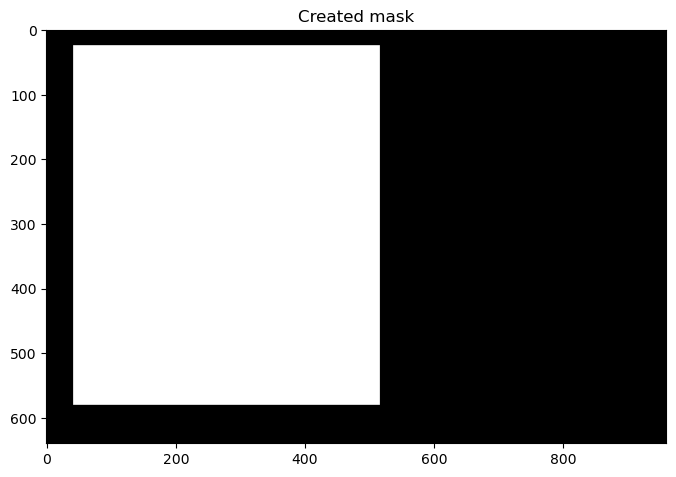

In [ ]:
mymask= np.zeros(im.shape[:2], dtype = "uint8")
mymask[int(y):int(y+h) , int(x):int(x+w)]= 255
mask_rgb = cv2.cvtColor(mymask,cv2.COLOR_BGR2RGB);
figure(figsize=(8, 6), dpi=100)
imgplot = plt.imshow(mask_rgb)
plt.title('Created mask')
plt.show()

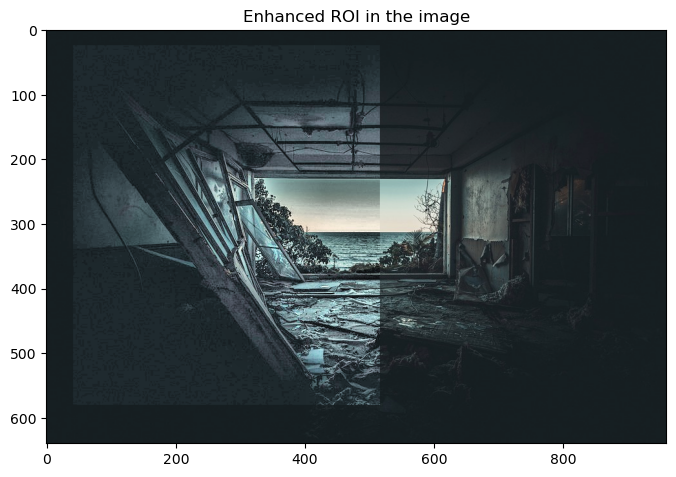

In [ ]:
#轉換顏色空間
imgHSV = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(8,8))

#選取顏色通道
v= imgHSV[:,:,2]
#開始轉換
v[int(y):int(y+h) , int(x):int(x+w)]= clahe.apply(v[int(y):int(y+h) , int(x):int(x+w)])

#再轉回RGB
enhanced = cv2.cvtColor(imgHSV,cv2.COLOR_HSV2RGB)
figure(figsize=(8, 6), dpi=100)
imgplot = plt.imshow(enhanced)
plt.title('Enhanced ROI in the image')
plt.show()